# Predicting Customer Churn Rate

# 1. Data Pre-processing

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV,train_test_split, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, precision_score, confusion_matrix, ConfusionMatrixDisplay, recall_score, roc_curve, roc_auc_score, classification_report
from sklearn.preprocessing import LabelEncoder
#!pip install xgboost
from xgboost import XGBClassifier
from xgboost import XGBClassifier


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Read and print dataset
import pandas as pd

df = pd.read_csv(":MyDrive/DNSC6315/churn.csv",index_col='RowNumber')

df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#Checking if we successfully drop column "RowNumber"
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
# Check for missing values in the entire DataFrame
missing_values = df.isnull().sum()

# Print the count of missing values for each column
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [ ]:
# Checking basic data information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB
None


In [ ]:
# Checking target variable distribution in the population
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create LabelEncoder objects
encoder_geography = LabelEncoder()
encoder_gender = LabelEncoder()

# Encode "geography" and "gender" columns
df['Geography'] = encoder_geography.fit_transform(df['Geography'])
df['Gender'] = encoder_gender.fit_transform(df['Gender'])

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  int32  
 4   Gender           10000 non-null  int32  
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int32(2), int64(8), object(1)
memory usage: 1015.6+ KB
None


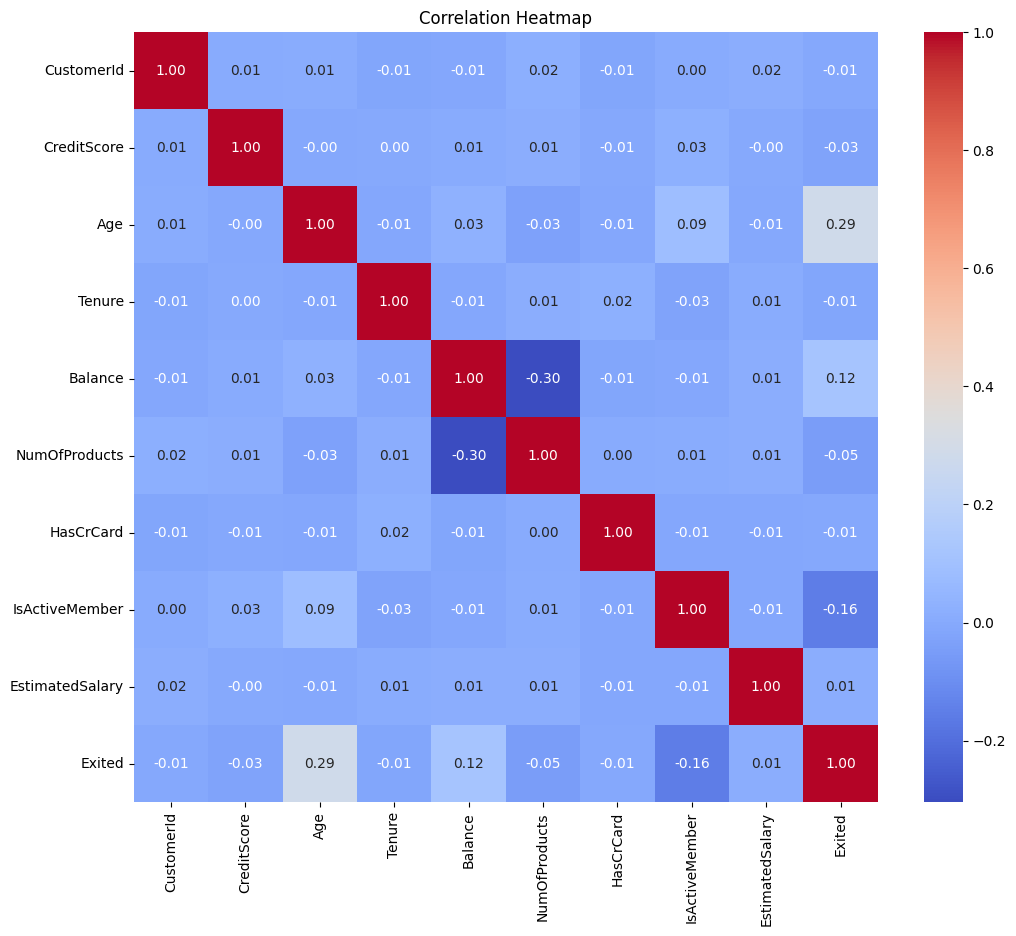

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 10))  # Set the size of the heatmap figure
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")  # Create the heatmap with correlation values annotated
plt.title('Correlation Heatmap')  # Set the title of the heatmap
plt.show()  # Show the heatmap

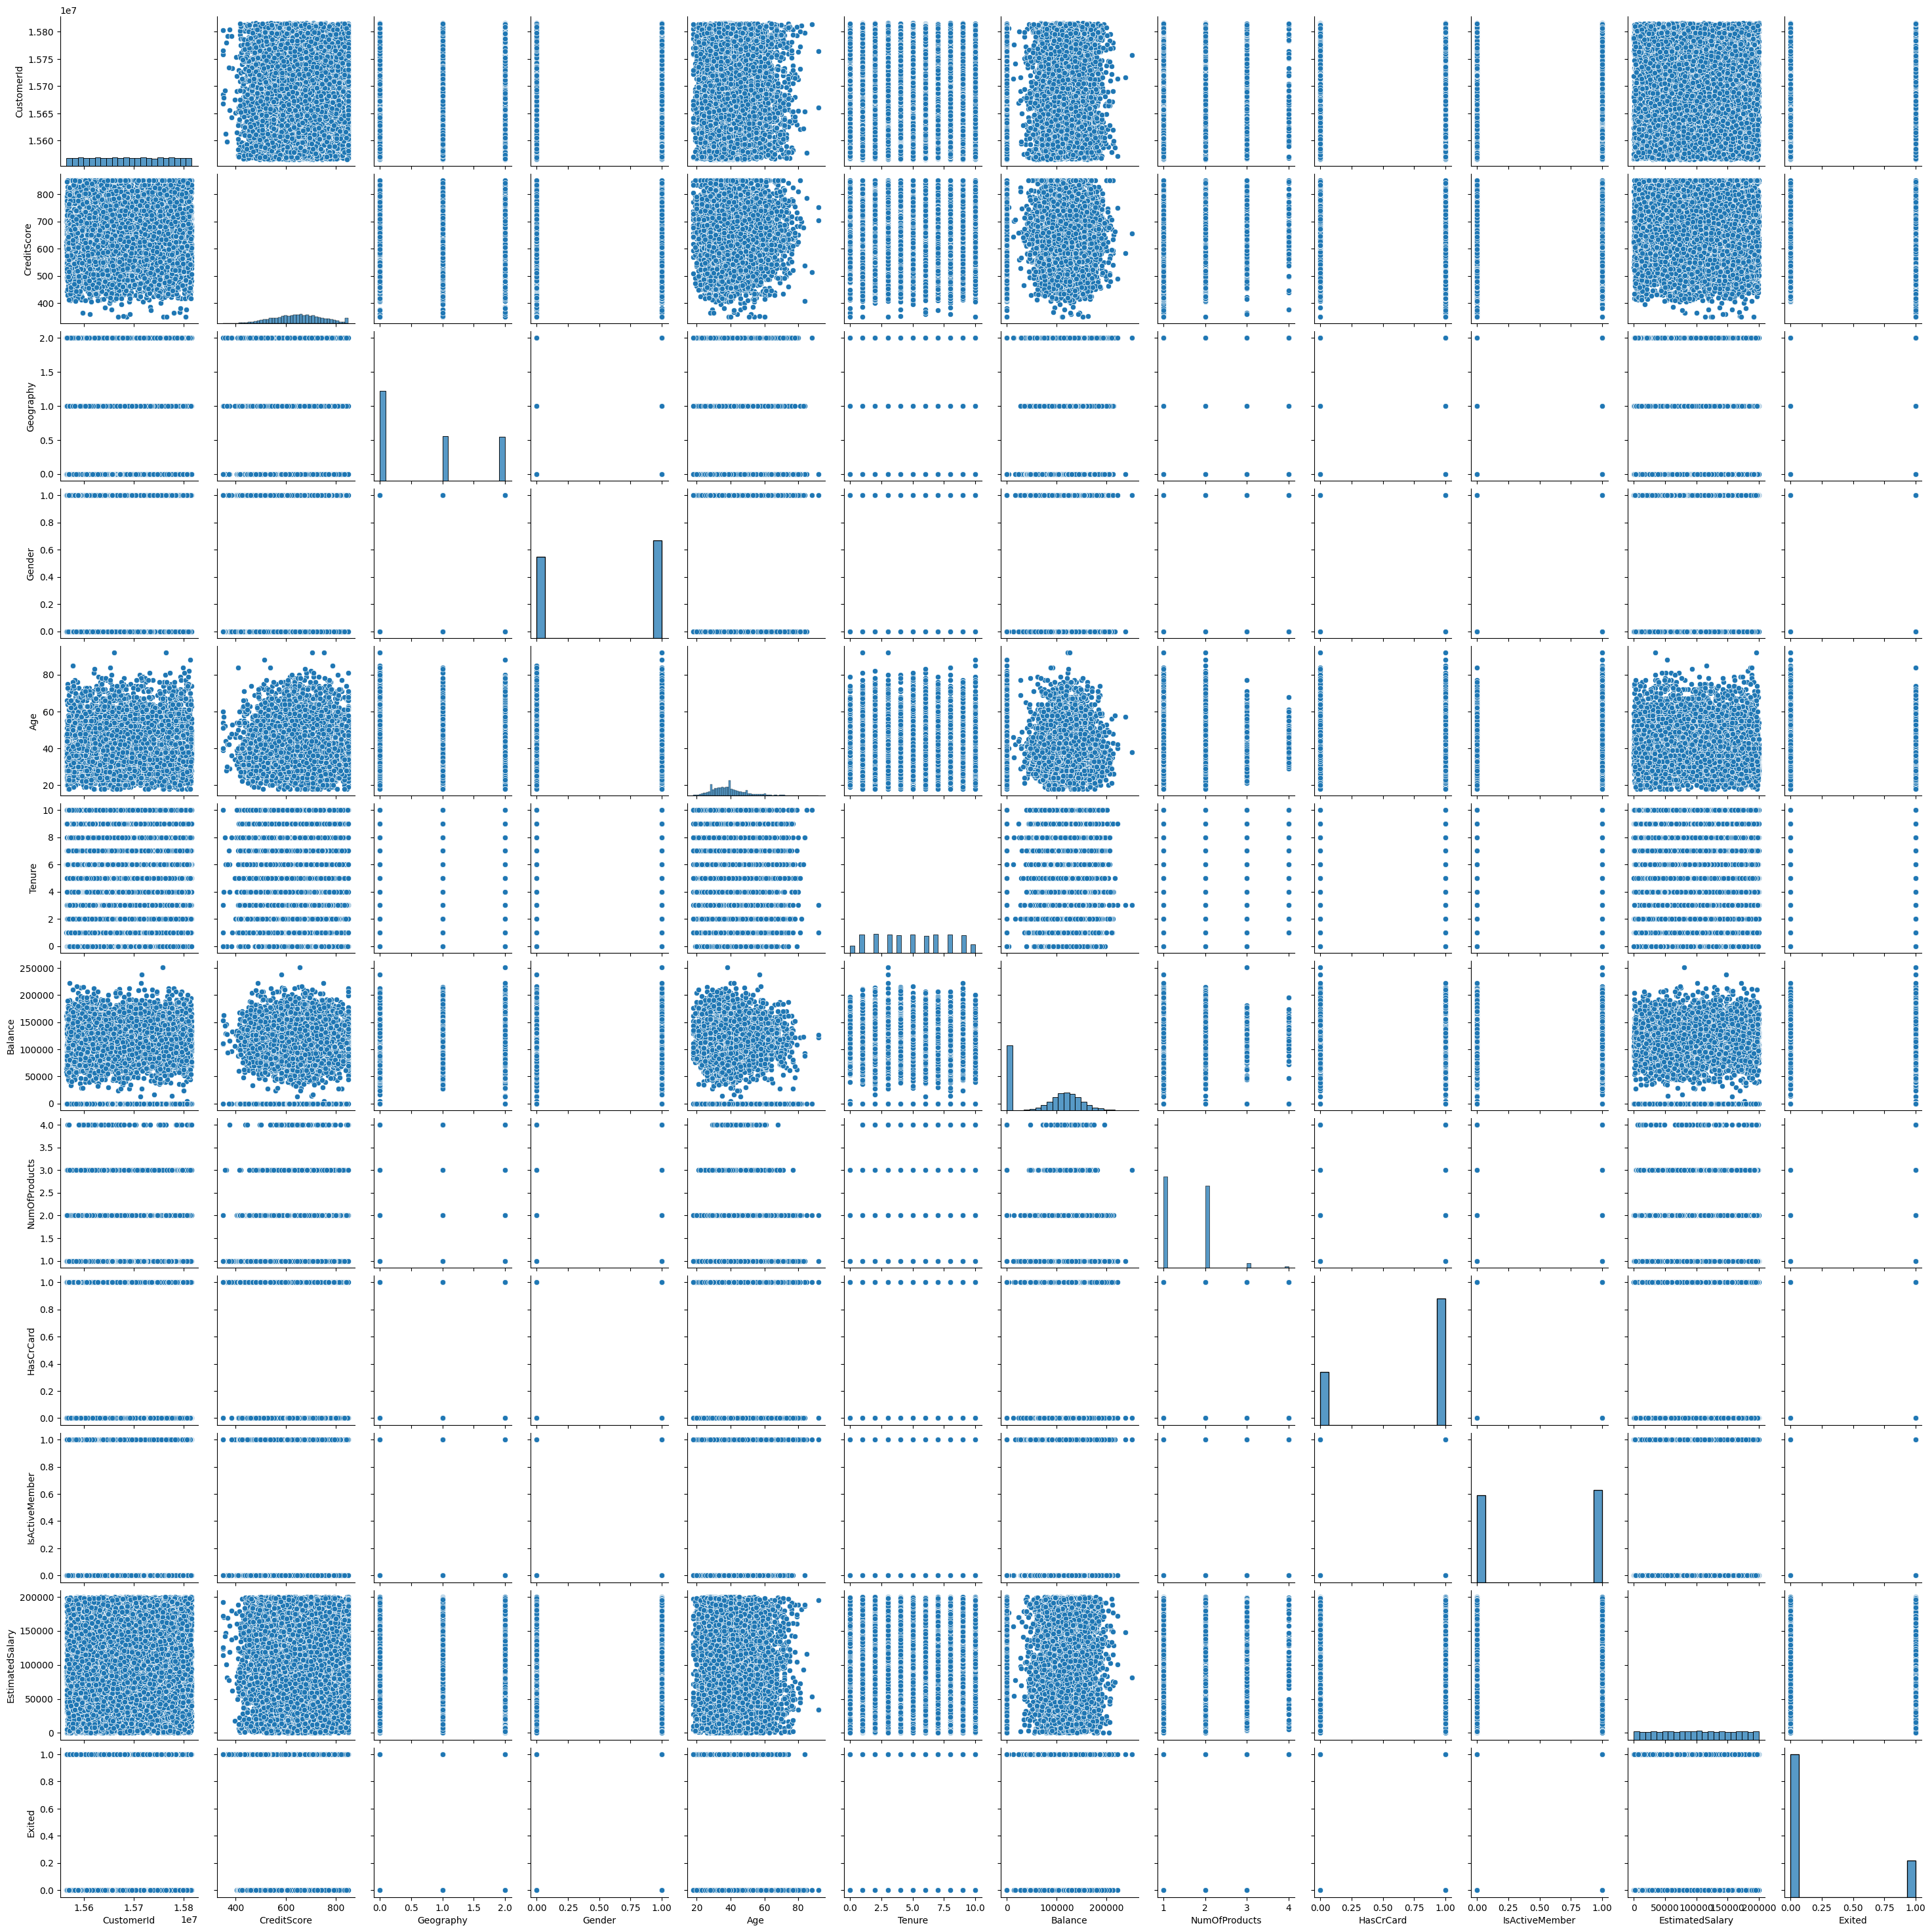

In [ ]:
sns.pairplot(data=df,)

# 2. Modeling

In [ ]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'df' is your original dataframe and you've listed your nominal columns
nominal_columns = ['Geography', 'Gender','Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

# One-hot encode the nominal columns
df_encoded = pd.get_dummies(df, columns=nominal_columns)

In [ ]:
from sklearn.preprocessing import StandardScaler
# Identify numerical columns (example)
numerical_cols = ['Age','Balance','CreditScore','EstimatedSalary']

scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

In [ ]:
print(df_encoded.columns)


Index(['CustomerId', 'Surname', 'CreditScore', 'Age', 'Balance',
       'EstimatedSalary', 'Exited', 'Geography_0', 'Geography_1',
       'Geography_2', 'Gender_0', 'Gender_1', 'Tenure_0', 'Tenure_1',
       'Tenure_2', 'Tenure_3', 'Tenure_4', 'Tenure_5', 'Tenure_6', 'Tenure_7',
       'Tenure_8', 'Tenure_9', 'Tenure_10', 'NumOfProducts_1',
       'NumOfProducts_2', 'NumOfProducts_3', 'NumOfProducts_4', 'HasCrCard_0',
       'HasCrCard_1', 'IsActiveMember_0', 'IsActiveMember_1'],
      dtype='object')


In [ ]:
df_encoded.head()

,CustomerId,Surname,CreditScore,Age,Balance,EstimatedSalary,Exited,Geography_0,Geography_1,Geography_2,...,Tenure_9,Tenure_10,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
RowNumber,,,,,,,,,,,,,,,,,,,,,
1,15634602,Hargrave,-0.326221,0.293517,-1.225848,0.021886,1,True,False,False,...,False,False,True,False,False,False,False,True,False,True
2,15647311,Hill,-0.440036,0.198164,0.117350,0.216534,0,False,False,True,...,False,False,True,False,False,False,True,False,False,True
3,15619304,Onio,-1.536794,0.293517,1.333053,0.240687,1,True,False,False,...,False,False,False,False,True,False,False,True,True,False
4,15701354,Boni,0.501521,0.007457,-1.225848,-0.108918,0,True,False,False,...,False,False,False,True,False,False,True,False,True,False
5,15737888,Mitchell,2.063884,0.388871,0.785728,-0.365276,0,False,False,True,...,False,False,True,False,False,False,False,True,False,True


## Fit Logistic Regression

In [ ]:
# randomly split into training and test
X = df_encoded[['CreditScore', 'Age', 'Balance',
       'EstimatedSalary', 'Geography_0', 'Geography_1', 'Geography_2',
       'Gender_0', 'Gender_1', 'Tenure_0', 'Tenure_1', 'Tenure_2', 'Tenure_3',
       'Tenure_4', 'Tenure_5', 'Tenure_6', 'Tenure_7', 'Tenure_8', 'Tenure_9',
       'Tenure_10', 'NumOfProducts_1', 'NumOfProducts_2', 'NumOfProducts_3',
       'NumOfProducts_4', 'HasCrCard_0', 'HasCrCard_1', 'IsActiveMember_0',
       'IsActiveMember_1']]
y = df_encoded['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=120)
log_model = LogisticRegression(random_state=0).fit(X_train, y_train)

# print coefficients and the intercept
print('The intercept beta_0 is ', log_model.intercept_, ' and the feature coefficients are ',log_model.coef_)

The intercept beta_0 is  [0.00316785]  and the feature coefficients are  [[-6.80658498e-02  7.72535867e-01 -3.87484299e-02  4.17971127e-03
  -3.24117042e-01  6.27486857e-01 -2.72670144e-01  2.50533518e-01
  -2.19833847e-01  1.37879069e-01  8.40187944e-02  7.44554200e-02
  -7.12720926e-02  1.70519177e-01 -1.14249671e-01  5.87698271e-02
  -7.26748152e-02 -4.91059921e-02  6.88279592e-03 -1.94522841e-01
  -1.15011283e+00 -2.72625199e+00  1.28800393e+00  2.61906056e+00
   3.31266064e-02 -2.42693492e-03  5.63594485e-01 -5.32894814e-01]]


In [ ]:
# Get in-sample prediction performance
y_pred_log=log_model.predict(X_train)
accuracy_score(y_train, y_pred_log)

0.84375

Score in each fold: [0.833125 0.845    0.84375  0.843125 0.84375 ]


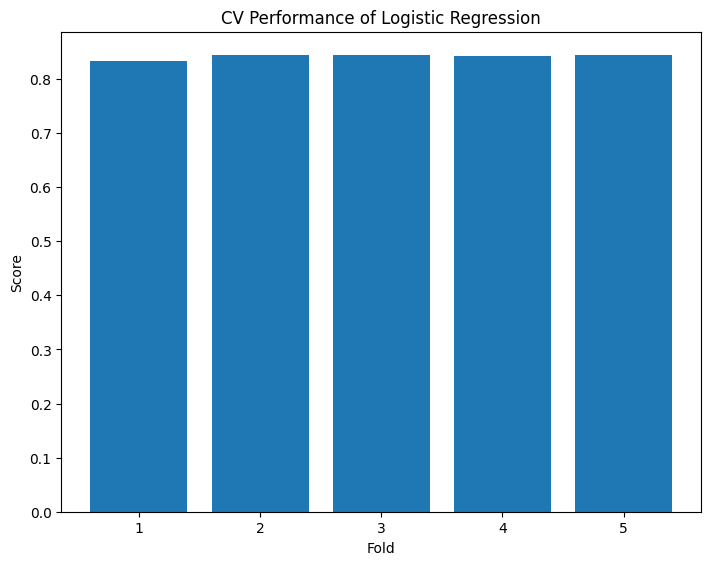

In [ ]:
LogReg = LogisticRegression(random_state=0)
K=5
scores = cross_val_score(LogReg,X_train,y_train,cv=K,scoring='accuracy')
print('Score in each fold:', scores)


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(np.arange(1,K+1),scores)
plt.xlabel("Fold")
plt.ylabel("Score")
plt.title('CV Performance of Logistic Regression')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Train the logistic regression model with fixed random state
log_model = LogisticRegression(random_state=251).fit(X_train, y_train)

# Make predictions on the test set
y_pred_log = log_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_log)

# Print classification report
print(classification_report(y_test, y_pred_log, digits=4))

# Print accuracy score
print("Accuracy score of Logistic Regression: ", accuracy)


              precision    recall  f1-score   support

           0     0.8596    0.9513    0.9031      1602
           1     0.6564    0.3744    0.4768       398

    accuracy                         0.8365      2000
   macro avg     0.7580    0.6628    0.6900      2000
weighted avg     0.8191    0.8365    0.8183      2000

Accuracy score of Logistic Regression:  0.8365


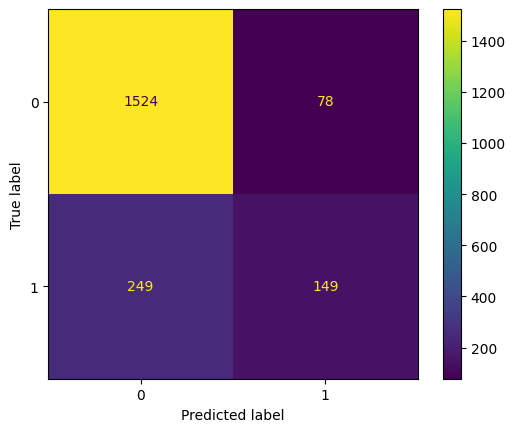

In [ ]:
cm = confusion_matrix(y_test, y_pred_log, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_model.classes_)
disp.plot()
plt.show()

In [ ]:
y_score = log_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Calculate AUC using both OvO and OvR strategies
auc_ovo = roc_auc_score(y_test, y_score, multi_class='ovo')
auc_ovr = roc_auc_score(y_test, y_score, multi_class='ovr')

print('AUC under ovo:', auc_ovo)
print('AUC under ovr:', auc_ovr)

AUC under ovo: 0.8252482763379947
AUC under ovr: 0.8252482763379947


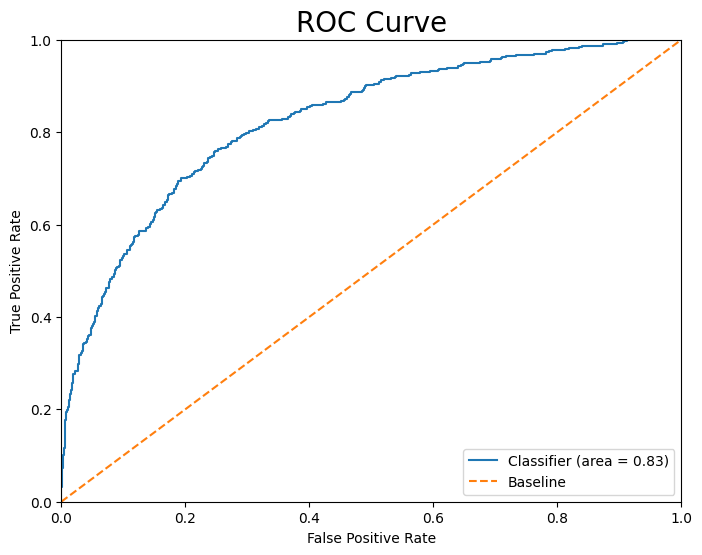

In [ ]:

# Calculate class probabilities, generate ROC curve, and compute AUC
y_proba=log_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
classifier_roc_auc = roc_auc_score(y_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Classifier (area = %0.2f)' % classifier_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Baseline', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve',fontsize = "20")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Get feature coefficients
feature_importance = log_model.coef_[0]

# Get the absolute values for feature importance
feature_importance = np.abs(feature_importance)

# Create a DataFrame to display feature importance
df_feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
df_feature_importance = df_feature_importance.sort_values(by='Importance', ascending=False)

print(df_feature_importance)

             Feature  Importance
21   NumOfProducts_2    2.726252
23   NumOfProducts_4    2.619061
22   NumOfProducts_3    1.288004
20   NumOfProducts_1    1.150113
1                Age    0.772536
5        Geography_1    0.627487
26  IsActiveMember_0    0.563594
27  IsActiveMember_1    0.532895
4        Geography_0    0.324117
6        Geography_2    0.272670
7           Gender_0    0.250534
8           Gender_1    0.219834
19         Tenure_10    0.194523
13          Tenure_4    0.170519
9           Tenure_0    0.137879
14          Tenure_5    0.114250
10          Tenure_1    0.084019
11          Tenure_2    0.074455
16          Tenure_7    0.072675
12          Tenure_3    0.071272
0        CreditScore    0.068066
15          Tenure_6    0.058770
17          Tenure_8    0.049106
2            Balance    0.038748
24       HasCrCard_0    0.033127
18          Tenure_9    0.006883
3    EstimatedSalary    0.004180
25       HasCrCard_1    0.002427


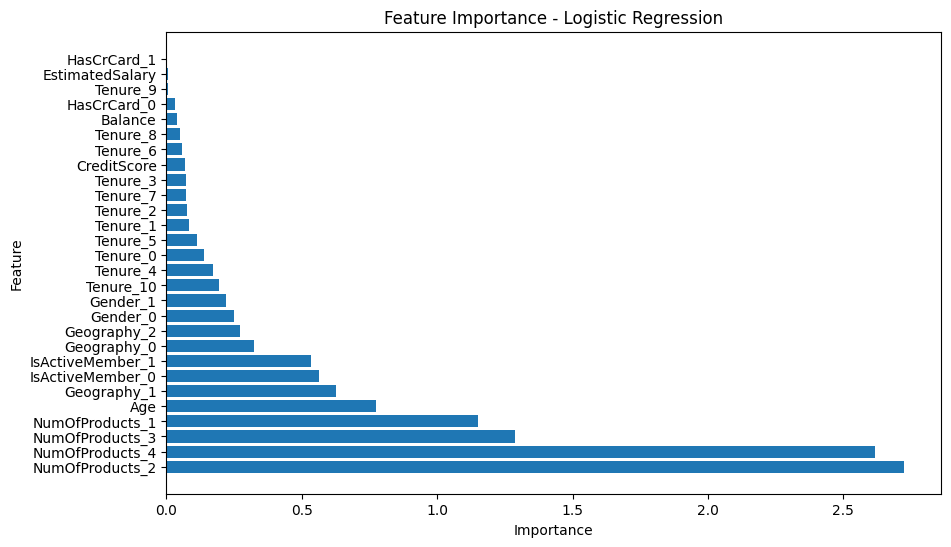

In [ ]:
import matplotlib.pyplot as plt

# Plot feature importance for logistic regression
plt.figure(figsize=(10, 6))
plt.barh(df_feature_importance['Feature'], df_feature_importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Logistic Regression')
plt.show()


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Initialize the Decision Tree classifier
tree_clf = DecisionTreeClassifier(random_state=251)

# Train the model on the training data
tree_clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_dct = tree_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_dct)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_dct))

Accuracy: 0.7845
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1602
           1       0.46      0.45      0.45       398

    accuracy                           0.78      2000
   macro avg       0.66      0.66      0.66      2000
weighted avg       0.78      0.78      0.78      2000



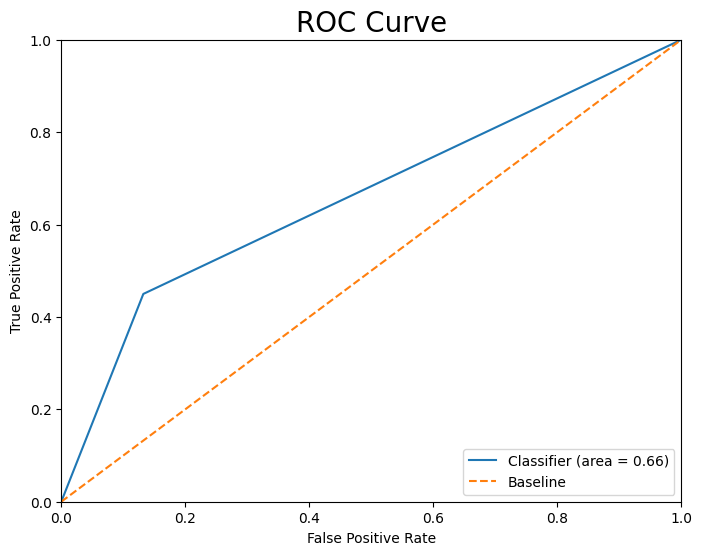

In [ ]:


# Calculate class probabilities, generate ROC curve, and compute AUC
y_proba=tree_clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
classifier_roc_auc = roc_auc_score(y_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Classifier (area = %0.2f)' % classifier_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Baseline', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve',fontsize = "20")
plt.legend(loc="lower right")
plt.show()

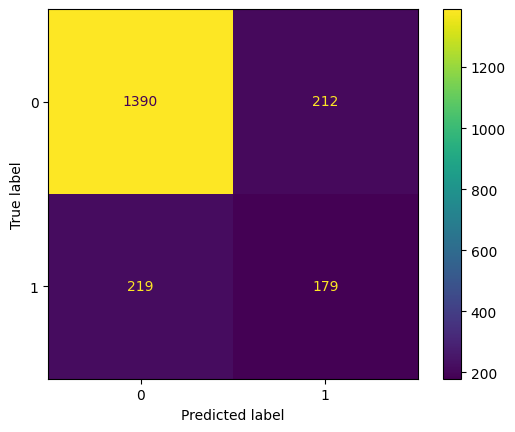

In [ ]:
cm = confusion_matrix(y_test, y_pred_dct, labels=tree_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_clf.classes_)
disp.plot()
plt.show()

In [ ]:
# Get feature importances
feature_importance = tree_clf.feature_importances_

# Create a DataFrame to display feature importance
df_feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
df_feature_importance = df_feature_importance.sort_values(by='Importance', ascending=False)

print(df_feature_importance)

             Feature  Importance
1                Age    0.217281
3    EstimatedSalary    0.146836
2            Balance    0.144803
0        CreditScore    0.125395
21   NumOfProducts_2    0.078410
26  IsActiveMember_0    0.039288
22   NumOfProducts_3    0.025645
5        Geography_1    0.025078
20   NumOfProducts_1    0.016663
8           Gender_1    0.014952
14          Tenure_5    0.013795
13          Tenure_4    0.013287
15          Tenure_6    0.010805
18          Tenure_9    0.010252
16          Tenure_7    0.010107
11          Tenure_2    0.009942
25       HasCrCard_1    0.009750
7           Gender_0    0.009372
23   NumOfProducts_4    0.009101
17          Tenure_8    0.008813
27  IsActiveMember_1    0.008709
4        Geography_0    0.008674
10          Tenure_1    0.008348
6        Geography_2    0.008092
24       HasCrCard_0    0.007665
12          Tenure_3    0.007339
19         Tenure_10    0.005865
9           Tenure_0    0.005735


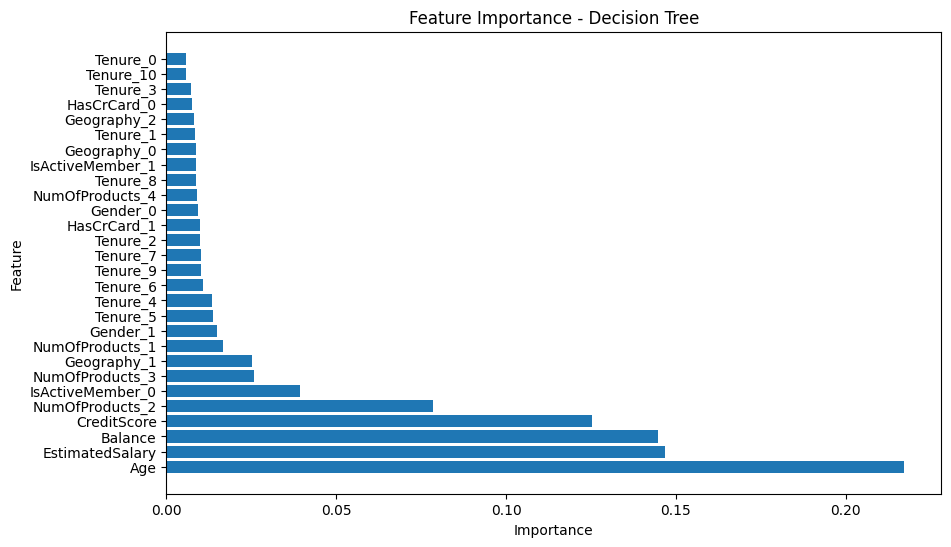

In [ ]:

# Plot feature importance for decision tree
plt.figure(figsize=(10, 6))
plt.barh(df_feature_importance['Feature'], df_feature_importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Decision Tree')
plt.show()


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split


# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=251)

# Train the model on the training data
rf_clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_rfc = rf_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rfc)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rfc))


Accuracy: 0.8585
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1602
           1       0.73      0.46      0.56       398

    accuracy                           0.86      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



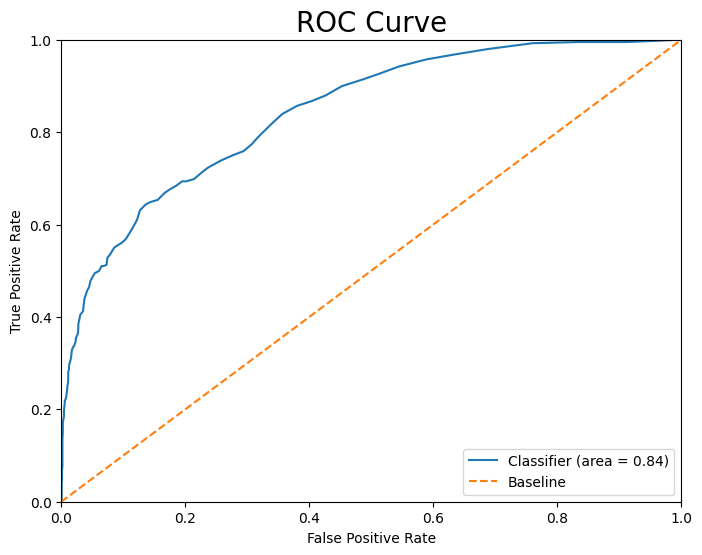

In [ ]:

# Calculate class probabilities, generate ROC curve, and compute AUC
y_proba=rf_clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
classifier_roc_auc = roc_auc_score(y_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Classifier (area = %0.2f)' % classifier_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Baseline', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve',fontsize = "20")
plt.legend(loc="lower right")
plt.show()

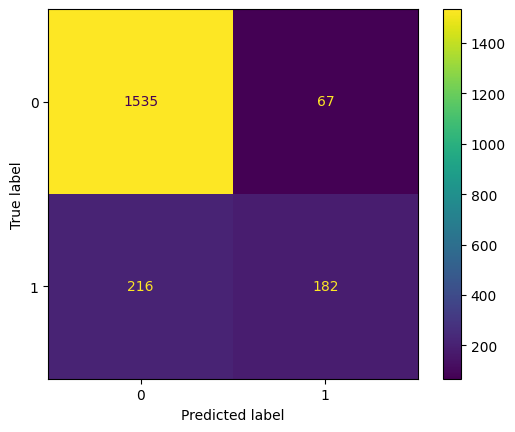

In [ ]:
cm = confusion_matrix(y_test, y_pred_rfc, labels=rf_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_clf.classes_)
disp.plot()
plt.show()

In [ ]:
feature_importance = rf_clf.feature_importances_

# Create a DataFrame to display feature importance
df_feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
df_feature_importance = df_feature_importance.sort_values(by='Importance', ascending=False)

print(df_feature_importance)


             Feature  Importance
1                Age    0.233978
2            Balance    0.129921
3    EstimatedSalary    0.128929
0        CreditScore    0.125204
21   NumOfProducts_2    0.060659
22   NumOfProducts_3    0.032217
20   NumOfProducts_1    0.030809
5        Geography_1    0.024223
26  IsActiveMember_0    0.021425
27  IsActiveMember_1    0.020468
24       HasCrCard_0    0.012855
4        Geography_0    0.012740
13          Tenure_4    0.012138
25       HasCrCard_1    0.012041
23   NumOfProducts_4    0.011655
15          Tenure_6    0.011312
7           Gender_0    0.011113
10          Tenure_1    0.011026
14          Tenure_5    0.010967
6        Geography_2    0.010797
18          Tenure_9    0.010731
11          Tenure_2    0.010470
16          Tenure_7    0.010170
12          Tenure_3    0.009978
17          Tenure_8    0.009944
8           Gender_1    0.009746
9           Tenure_0    0.007405
19         Tenure_10    0.007079


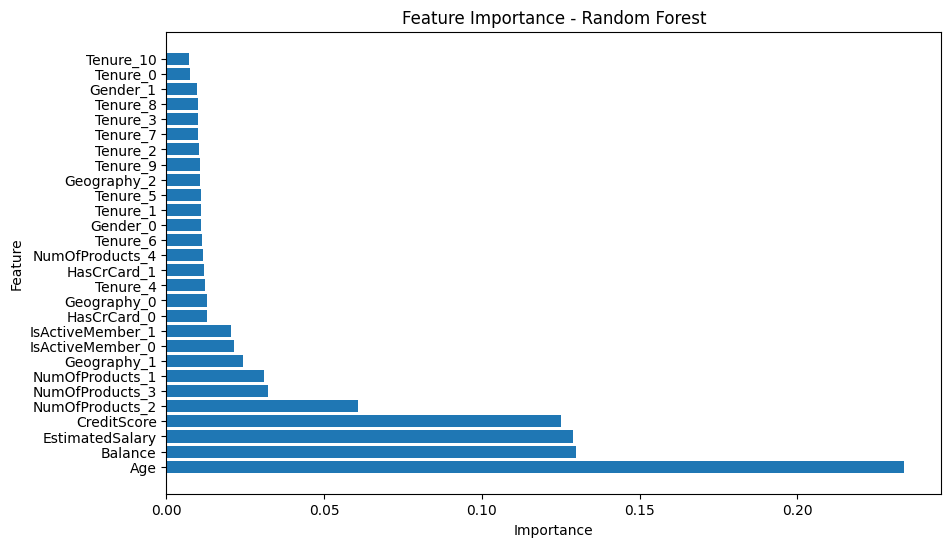

In [ ]:


# Plot feature importance for random forest
plt.figure(figsize=(10, 6))
plt.barh(df_feature_importance['Feature'], df_feature_importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Random Forest')
plt.show()


## XGBoost

In [ ]:
import re
import xgboost as xgb

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss',random_state=251)

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_xgb)
class_report = classification_report(y_test, y_pred_xgb)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(class_report)

Accuracy: 0.8465
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1602
           1       0.67      0.44      0.53       398

    accuracy                           0.85      2000
   macro avg       0.77      0.69      0.72      2000
weighted avg       0.83      0.85      0.83      2000



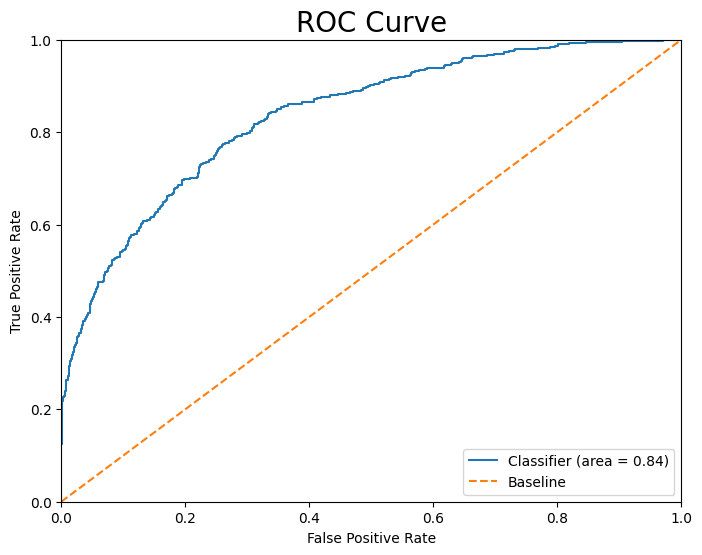

In [ ]:

# Calculate class probabilities, generate ROC curve, and compute AUC
y_proba=xgb_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
classifier_roc_auc = roc_auc_score(y_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Classifier (area = %0.2f)' % classifier_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Baseline', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve',fontsize = "20")
plt.legend(loc="lower right")
plt.show()

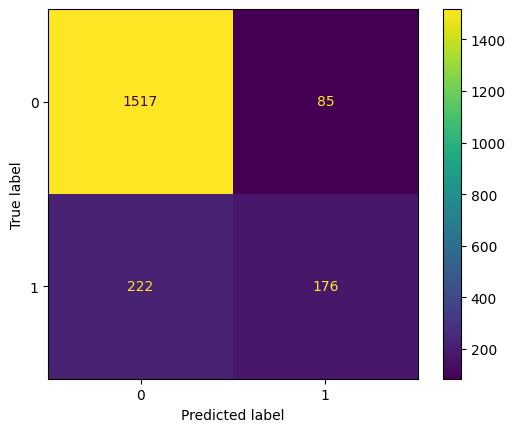

In [ ]:
cm = confusion_matrix(y_test, y_pred_xgb, labels=xgb_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_)
disp.plot()
plt.show()

             Feature  Importance
21   NumOfProducts_2    0.248574
22   NumOfProducts_3    0.132190
20   NumOfProducts_1    0.084402
26  IsActiveMember_0    0.069750
1                Age    0.055903
5        Geography_1    0.046652
2            Balance    0.025724
6        Geography_2    0.025235
7           Gender_0    0.024825
23   NumOfProducts_4    0.023847
19         Tenure_10    0.022304
10          Tenure_1    0.021526
17          Tenure_8    0.021272
15          Tenure_6    0.020685
9           Tenure_0    0.018404
13          Tenure_4    0.018235
14          Tenure_5    0.017636
3    EstimatedSalary    0.017336
0        CreditScore    0.017066
18          Tenure_9    0.016574
16          Tenure_7    0.015257
4        Geography_0    0.015138
24       HasCrCard_0    0.014557
12          Tenure_3    0.013922
11          Tenure_2    0.012987
8           Gender_1    0.000000
25       HasCrCard_1    0.000000
27  IsActiveMember_1    0.000000


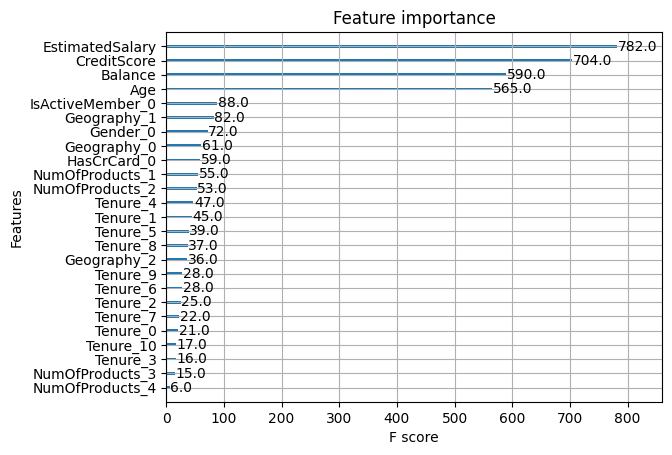

In [ ]:
# Get feature importances
feature_importance = xgb_model.feature_importances_

# Create a DataFrame to display feature importance
df_feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
df_feature_importance = df_feature_importance.sort_values(by='Importance', ascending=False)

print(df_feature_importance)

# Plot feature importance
xgb.plot_importance(xgb_model)
plt.show()


### Business Problem

           CreditScore       Age   Balance  EstimatedSalary  Geography_0  \
RowNumber                                                                  
3224          1.298222  0.007457  0.446572        -0.357991        False   
3687          0.573948 -1.994969  1.597159         0.514088         True   
9379          0.604988 -0.373958  0.566420        -1.520069        False   
7589         -0.740092 -0.564665 -1.225848        -0.787264        False   
6391         -0.791826 -0.183251 -1.225848        -1.179460        False   
...                ...       ...       ...              ...          ...   
4035         -0.512463  0.293517  0.324998         1.724161        False   
3209         -0.450383 -0.278604  1.072788        -0.038451        False   
7279         -0.088246 -0.564665  0.130163        -0.696095         True   
9698         -1.216044  1.151700  0.818339        -0.357017        False   
1077          0.532561  0.007457 -1.225848        -0.007584        False   

           

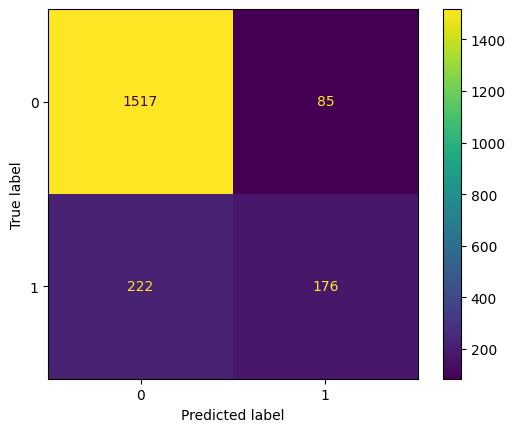

In [ ]:
# Create a DataFrame with independent variables and labels
dfy = X_test.copy()
#dfy['Actual Label'] = y_test
#dfy['Predicted Label'] = y_pred_xgb

# Display DataFrame
#print("DataFrame with Predicted and Actual Labels:")
print(dfy)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb, labels=xgb_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_)
disp.plot()
plt.show()

In [ ]:
dfy.columns

Index(['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Geography_0',
       'Geography_1', 'Geography_2', 'Gender_0', 'Gender_1', 'Tenure_0',
       'Tenure_1', 'Tenure_2', 'Tenure_3', 'Tenure_4', 'Tenure_5', 'Tenure_6',
       'Tenure_7', 'Tenure_8', 'Tenure_9', 'Tenure_10', 'NumOfProducts_1',
       'NumOfProducts_2', 'NumOfProducts_3', 'NumOfProducts_4', 'HasCrCard_0',
       'HasCrCard_1', 'IsActiveMember_0', 'IsActiveMember_1'],
      dtype='object')

In [ ]:
dfy.head()

,CreditScore,Age,Balance,EstimatedSalary,Geography_0,Geography_1,Geography_2,Gender_0,Gender_1,Tenure_0,...,Tenure_9,Tenure_10,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
RowNumber,,,,,,,,,,,,,,,,,,,,,
3224,1.298222,0.007457,0.446572,-0.357991,False,False,True,False,True,False,...,False,False,True,False,False,False,True,False,True,False
3687,0.573948,-1.994969,1.597159,0.514088,True,False,False,False,True,False,...,False,False,False,True,False,False,False,True,True,False
9379,0.604988,-0.373958,0.566420,-1.520069,False,False,True,True,False,False,...,False,False,False,True,False,False,False,True,True,False
7589,-0.740092,-0.564665,-1.225848,-0.787264,False,False,True,False,True,False,...,False,False,False,True,False,False,False,True,False,True
6391,-0.791826,-0.183251,-1.225848,-1.179460,False,False,True,True,False,False,...,False,False,False,True,False,False,False,True,True,False


In [ ]:
# Assuming 'new_data_encoded' is the DataFrame with predictions or evaluation results

# Inverse transform the standardized numerical columns
dfy[numerical_cols] = scaler.inverse_transform(dfy[numerical_cols])


In [ ]:
dfy

,CreditScore,Age,Balance,EstimatedSalary,Geography_0,Geography_1,Geography_2,Gender_0,Gender_1,Tenure_0,...,Tenure_9,Tenure_10,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
RowNumber,,,,,,,,,,,,,,,,,,,,,
3224,776.0,39.0,104349.45,79503.05,False,False,True,False,True,False,...,False,False,True,False,False,False,True,False,True,False
3687,706.0,18.0,176139.50,129654.22,True,False,False,False,True,False,...,False,False,False,True,False,False,False,True,True,False
9379,709.0,35.0,111827.27,12674.68,False,False,True,True,False,False,...,False,False,False,True,False,False,False,True,True,False
7589,579.0,33.0,0.00,54816.57,False,False,True,False,True,False,...,False,False,False,True,False,False,False,True,False,True
6391,574.0,37.0,0.00,32262.28,False,False,True,True,False,False,...,False,False,False,True,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4035,601.0,42.0,96763.89,199242.65,False,False,True,True,False,False,...,False,False,True,False,False,False,False,True,False,True
3209,607.0,36.0,143421.74,97879.02,False,True,False,False,True,False,...,False,False,True,False,False,False,False,True,True,False
7279,642.0,33.0,84607.34,60059.47,True,False,False,True,False,False,...,False,False,False,True,False,False,True,False,False,True


In [ ]:
import numpy as np
from sklearn.metrics import f1_score

def select_threshold(model, X_val, y_val):
    # Get predicted probabilities for the positive class (churn)
    y_pred_proba = model.predict_proba(X_val)[:, 1]

    # Define a range of thresholds to evaluate
    thresholds = np.arange(0.1, 1.0, 0.05)

    best_threshold = None
    best_f1 = 0

    # Iterate over thresholds and calculate F1-score for each
    for threshold in thresholds:
        y_pred = (y_pred_proba >= threshold).astype(int)
        f1 = f1_score(y_val, y_pred)

        # Update best threshold if F1-score improves
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    return best_threshold, best_f1

# Assuming you have trained an XGBoost model named 'model' and have validation data X_val, y_val
best_threshold, best_f1 = select_threshold(xgb_model, X_test, y_test)
print("Best Threshold:", best_threshold)
print("Best F1-score:", best_f1)

Best Threshold: 0.30000000000000004
Best F1-score: 0.5613608748481167


In [ ]:
# Calculate the total balance per customer for a
dfy['Revenue'] = ((dfy['Balance']*0.7+ dfy['EstimatedSalary']*(0.3/12)*3)*0.15 )- ((dfy['Balance']*0.7+ dfy['EstimatedSalary']*(0.3/12)*3)*0.03)+50

In [ ]:
dfy.head()

,CreditScore,Age,Balance,EstimatedSalary,Geography_0,Geography_1,Geography_2,Gender_0,Gender_1,Tenure_0,...,Tenure_10,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1,Revenue
RowNumber,,,,,,,,,,,,,,,,,,,,,
3224,776.0,39.0,104349.45,79503.05,False,False,True,False,True,False,...,False,True,False,False,False,True,False,True,False,9530.88125
3687,706.0,18.0,176139.50,129654.22,True,False,False,False,True,False,...,False,False,True,False,False,False,True,True,False,16012.60598
9379,709.0,35.0,111827.27,12674.68,False,False,True,True,False,False,...,False,False,True,False,False,False,True,True,False,9557.56280
7589,579.0,33.0,0.00,54816.57,False,False,True,False,True,False,...,False,False,True,False,False,False,True,False,True,543.34913
6391,574.0,37.0,0.00,32262.28,False,False,True,True,False,False,...,False,False,True,False,False,False,True,True,False,340.36052


In [ ]:
# Assuming you have already trained a churn prediction model and selected a threshold
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]
threshold = best_threshold  # Assuming you have selected a threshold
y_pred = (y_pred_proba >= threshold).astype(int)

In [ ]:
# Segment customers based on churn predictions
#churned_customers = dfy[y_pred == 1]
#non_churned_customers = dfy[y_pred == 0]

### Revenue before the Machine Learning

In [ ]:

# Calculate revenue from non-churned customers before using the ML model
Revenue_before_ml = dfy[y_test == 0]['Revenue'].sum()
print("Total Revenue Before Using ML Model:", Revenue_before_ml)


Total Revenue Before Using ML Model: 11437441.413059998


### Revenue After using Machine Learning Model

In [ ]:
#increasing the intrest rate to 5%
dfy['Revenue2'] = ((dfy['Balance']*0.7+ dfy['EstimatedSalary']*(0.3/12)*3)*0.15 )- ((dfy['Balance']*0.7+ dfy['EstimatedSalary']*(0.5/12)*3)*0.03)+50

In [ ]:
false_negatives_revenue = dfy[(y_pred == 0) & (y_test == 1)]['Revenue'].sum()
# False positives: Non-churners predicted as churners
false_positives_revenue = dfy[(y_pred == 1) & (y_test == 0)]['Revenue2'].sum()
revenue_for_ml_non_churned = dfy[(y_pred == 0) & (y_test == 0) ]['Revenue'].sum()
revenue_after_ml_churned = dfy[(y_pred == 1) & (y_test == 1)]['Revenue2'].sum()

print("Total Revenue  for False Negative:", false_negatives_revenue)
print("Total Revenue  for False Positive:", false_positives_revenue)
print("Total Revenue  for non_churned :", revenue_for_ml_non_churned)
print("Total Revenue  for churned:", revenue_after_ml_churned)

Total Revenue  for False Negative: 1370839.3273
Total Revenue  for False Positive: 1733796.56545
Total Revenue  for non_churned : 9676698.26732
Total Revenue  for churned: 2016805.9087049996


In [ ]:
Total_Revenue_After_ML = revenue_after_ml_churned+revenue_for_ml_non_churned +false_positives_revenue
print("Total Revenue After using the Machine learning model for a Quarters : ", Total_Revenue_After_ML)

Total Revenue After using the Machine learning model for a Quarters :  13427300.741475


In [ ]:
Difference_in_Revenue = Total_Revenue_After_ML - Revenue_before_ml
print("Differeence in Revenue Before and After Using the Machine Learning Model for a Quarters : ", Difference_in_Revenue)

Differeence in Revenue Before and After Using the Machine Learning Model for a Quarters :  1989859.3284150008
